In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')


In [2]:
wine_df = pd.read_csv("./winequality-red.csv")
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<b>QUESTION 1:</b>What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.<Br>
<b>SOLUTION: </b>
    Input variables (based on physicochemical tests):
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data):
- 12 - quality (score between 0 and 10)<Br>
    
Initially, all the features are important and will be fed into the model. however, it will require domain expertise to select a few relatively more important features out of the given 11 features.

<b>QUESTION 2:</b>How did you handle missing data in the wine quality data set during the feature engineering process?Discuss the advantages and disadvantages of different imputation techniques.<Br>
<b>SOLUTION: </b>There are no missing values in this dataset.<Br>
If there were null values, we could one of the following methods, depending on the data type:
* dropping null values
* mean value imputation
* median value imputation
* mode value imputation

In [3]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<b>QUESTION 3:</b> What are the key factors that affect students' performance in exams? How would you go about
analyzing these factors using statistical techniques?<Br>
<b>SOLUTION: </b><Br>

In [4]:
stud_df = pd.read_csv('./stud.csv')
stud_df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Practically speaking, the preparation of the students and their meals and nutrition are key factors in determinining their performance in exams.<br>
We can use different statistical tools like correlation matrix, scatter plots, etc. to identify which features matter more than others.

<b>QUESTION 4:</b>Describe the process of feature engineering in the context of the student performance data set. How
did you select and transform the variables for your model?<Br> 
<b>SOLUTION</b><Br>

In [5]:
stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


* We find that gender, lunch and test_prepartion_course have 2 categories each, so we use One Hot Encoding for these columns.
* For parental_level_of_education and race_ethnicity columns, we use Label Encoding,because there's multiple categories.
* We will then combine these individually encoded dataframes into one final dataframe, stored in the variable final_Df.

##### ONE HOT ENCODING

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
ohe_cols = ['gender','lunch','test_preparation_course']
ohe = OneHotEncoder()

ohe_array = ohe.fit_transform(stud_df[ohe_cols]).toarray()

In [8]:
ohe_df = pd.DataFrame(ohe_array, columns=ohe.get_feature_names_out())

In [9]:
ohe_df

,gender_female,gender_male,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...
995,1.0,0.0,0.0,1.0,1.0,0.0
996,0.0,1.0,1.0,0.0,0.0,1.0
997,1.0,0.0,1.0,0.0,1.0,0.0
998,1.0,0.0,0.0,1.0,1.0,0.0


#### LABEL ENCODING

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
le_ethnicity = le.fit_transform(stud_df['race_ethnicity'])
le_ethnicity_df = pd.DataFrame(le_ethnicity)

In [12]:
le_education = le.fit_transform(stud_df['parental_level_of_education'])
le_education_df = pd.DataFrame(le_education)

#### MAKING A DATAFRAME CONSISTING ONLY OF THE NUMERICAL COLUMNS

In [13]:
numerical_cols = [column for column in stud_df.columns if stud_df[column].dtype != 'object']
numerical_df = pd.DataFrame(stud_df[numerical_cols])
numerical_df

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


#### CONCATENATING THE DATAFRAMES TO MAKE ONE FINAL DATAFRAME

In [14]:
final_df = pd.concat([ohe_df, le_ethnicity_df, le_education_df, numerical_df], axis=1)

In [15]:
final_df

,gender_female,gender_male,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none,0,0,math_score,reading_score,writing_score
0,1.0,0.0,0.0,1.0,0.0,1.0,1,1,72,72,74
1,1.0,0.0,0.0,1.0,1.0,0.0,2,4,69,90,88
2,1.0,0.0,0.0,1.0,0.0,1.0,1,3,90,95,93
3,0.0,1.0,1.0,0.0,0.0,1.0,0,0,47,57,44
4,0.0,1.0,0.0,1.0,0.0,1.0,2,4,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,1.0,1.0,0.0,4,3,88,99,95
996,0.0,1.0,1.0,0.0,0.0,1.0,2,2,62,55,55
997,1.0,0.0,1.0,0.0,1.0,0.0,2,2,59,71,65
998,1.0,0.0,0.0,1.0,1.0,0.0,3,4,68,78,77


#### This dataframe is now completely encoded.

<b>QUESTION 5:</b>Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
these features to improve normality?<Br>
<b>SOLUTION: </b> The following columns do not follow normal distribution:<Br>
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* sulphates
* alcohol
  
    
The code in the following cells exhibits this.<Br>
    
The following transformations can be applied to these features to improve normality:
* Log Transformation
* Square-Root Transformation
* Reciprocal Transformation
* Box-Cox Transformation
* Yeo-Johnson Transformation

In [16]:
import seaborn as sns

In [17]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

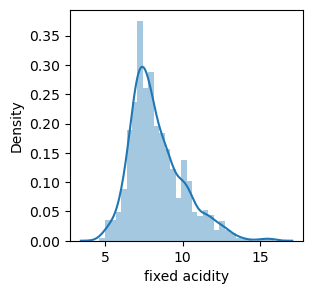

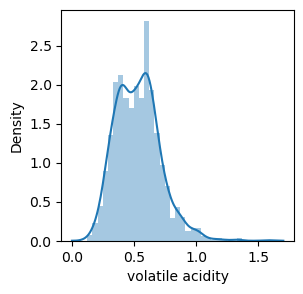

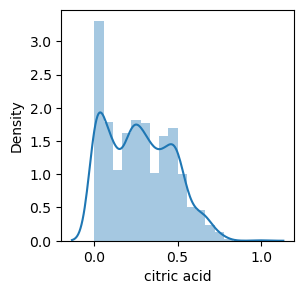

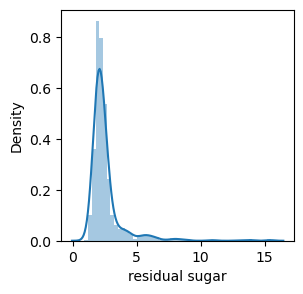

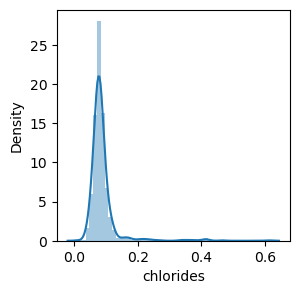

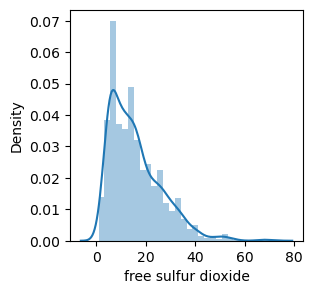

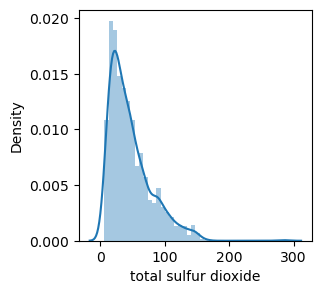

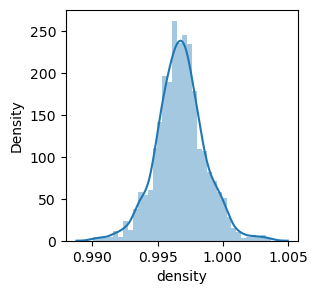

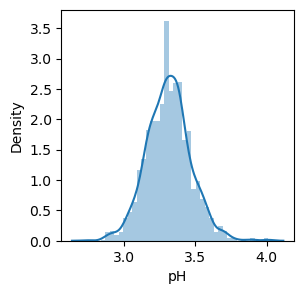

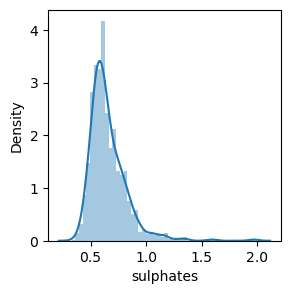

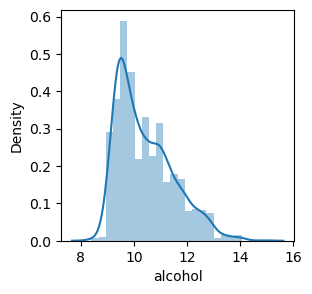

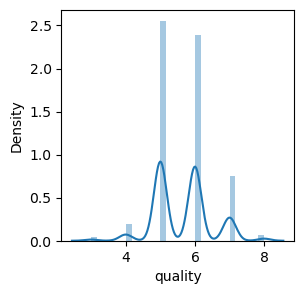

In [18]:
for column in wine_df.columns:
    plt.figure(figsize=(3,3))
    sns.distplot(wine_df[column], kde=True)
    print(end='')

<b>QUESTION 6:</b>Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?<Br>
<b>SOLUTION: </b>6 components are required to explain 90% variance in the data.<Br>

In [19]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [29]:
#splitting the data into X and y
X = wine_df.iloc[:,:11]
y = wine_df.iloc[:,-1]

In [30]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

#### FEATURE SCALING

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### APPLYING THE PCA FUNCTION TO TRAINING SET AND TESTING SET OF X FOR ANALYSIS

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)   #number of components to keep

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [33]:
pca.explained_variance_ratio_

array([0.2801769 , 0.17563995, 0.13957636, 0.11081822, 0.09021248,
       0.05908698, 0.05266627, 0.03883888, 0.03129468, 0.01600997,
       0.0056793 ])

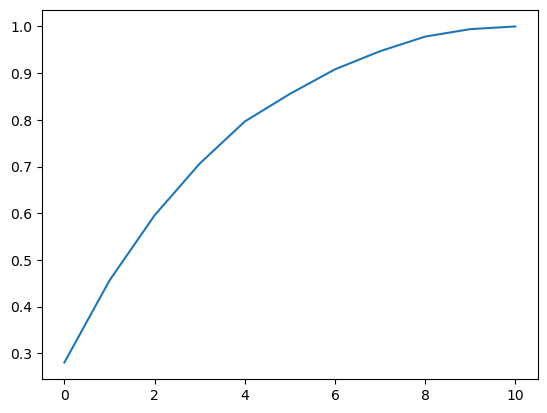

In [35]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.cumsum(pca.explained_variance_ratio_));

90% variance is explained by 6 components